# Predict Canada Per Capita Income ML Model

In [38]:
# Designed by : ALTAF HUSAIN DATA ANALYST

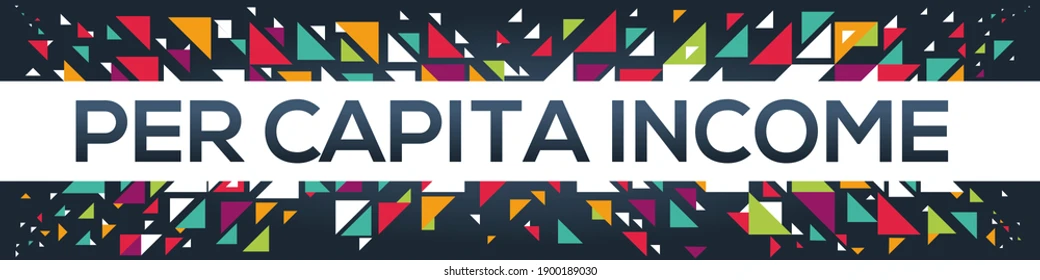

# Step 1 : Load Important Modules

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
import warnings
warnings.filterwarnings('ignore')
print("All module s loaded succesfully")

All module s loaded succesfully


# Step 2 : Load Data

In [40]:
import kagglehub
path = kagglehub.dataset_download("ananthu19/canada-per-capita-income-prediction")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\SK COMPUTER\.cache\kagglehub\datasets\ananthu19\canada-per-capita-income-prediction\versions\1


In [41]:
import os
final_data = path + "/" + os.listdir(path)[0]

In [42]:
df = pd.read_csv(final_data)

In [43]:
# step 2.1 :
df.sample()

,year,income
4,1974,5576.514583


In [44]:
# step 2.2 :
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [45]:
# step 2.3 :
df.tail()


,year,income
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


In [46]:
# step 2.4:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    47 non-null     int64  
 1   income  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [47]:
# ML only works on numerical data, and here all cols are numerical in nature , we can proceed

# setp 3: EDA

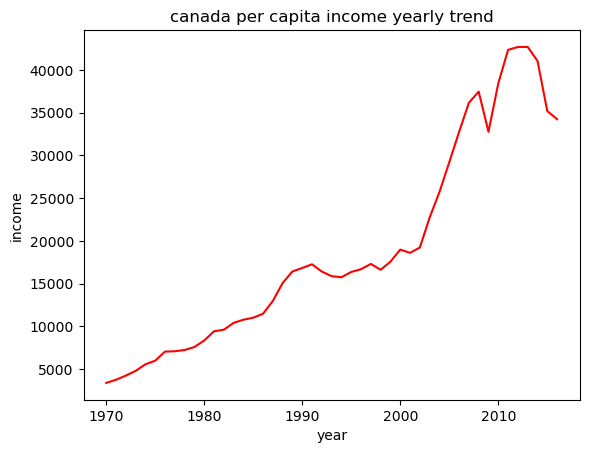

In [48]:
# step 3.1 :
sns.lineplot(data = df,x = 'year',y = 'income',color = 'r')
plt.title('canada per capita income yearly trend')
plt.show()

In [49]:
# we can use linear Regression , because  X and y are correlated

In [50]:
# step 3.2 :
df.describe()

,year,income
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [51]:
# step 3.3 :
df.corr() # .94 cor value ,which shows high correlation trend is increasing

,year,income
year,1.000000,0.943884
income,0.943884,1.000000


# step 4 : Divide data in X and y
- X = features: (year)
- y = Targets: (income)

In [52]:
X = df[['year']]
X.shape


(47, 1)

In [53]:
X.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [54]:
y = df['income']
y.shape

(47,)

In [55]:
y.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: income, dtype: float64

In [56]:
# Best line fins :
# Y = m * x +c
# M and C
# we can easily find line

# Step 5 : Model Buildng

In [57]:
# step 5.1 :
lr_model = LinearRegression()

In [58]:
# step 5.2 :
lr_model.fit(X,y) # this ois for model training

LinearRegression()

In [59]:
# step 5.3 :
y_pred = lr_model.predict(X)  # model predict value based on  X(year)

In [60]:
temp_df = df.copy()
temp_df['y_pred_capita'] = y_pred

In [61]:
temp_df.sample(10)

,year,income,y_pred_capita
9,1979,7602.912681,7321.626010
31,2001,18601.397240,25547.857665
30,2000,18987.382410,24719.392590
36,2006,32738.262900,29690.183041
45,2015,35175.188980,37146.368718
6,1976,7062.131392,4836.230785
32,2002,19232.175560,26376.322740
12,1982,9619.438377,9807.021236
1,1971,3768.297935,693.905409
19,1989,16426.725480,15606.276763


# Step 6 : Visualize Actual vs Predicted

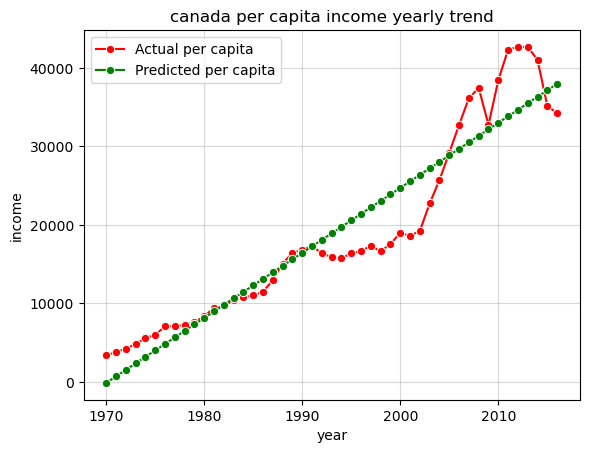

In [62]:
# step 3.1 :
sns.lineplot(data = df,x = 'year',y = 'income',color = 'r',marker= 'o',label = 'Actual per capita')
sns.lineplot(data = temp_df,x = 'year',y = 'y_pred_capita',color = 'g',marker= 'o',label = 'Predicted per capita')
plt.grid(alpha = 0.5)
plt.legend()
plt.title('canada per capita income yearly trend')
plt.show()

# Step 7 : checkimg Metrics and Model Evaluation (errors)

In [63]:
# step 7.1 :
mae = ((temp_df['income'] - temp_df['y_pred_capita']).abs()).mean()
print('Mean absolute error :',mae)

Mean absolute error : 3088.866427771443


In [64]:
# step 7.2 :
mae_sk = mean_absolute_error(y,y_pred)
print('Mean absolute error :',mae_sk)

Mean absolute error : 3088.866427771443


In [65]:
# step 7.3:
mse = ((temp_df['income'] - temp_df['y_pred_capita'])** 2).mean()
print('Mean squared error :',mse)

Mean squared error : 15462739.061504772


In [66]:
# step 7.4 :
mse_sk = mean_squared_error(y,y_pred)
print('Mean squared error :',mse_sk)

Mean squared error : 15462739.061504772


In [67]:
# step 7.5 :
rmse = mse ** 0.5
print('root Mean squared error :',rmse)

root Mean squared error : 3932.268945723928


In [68]:
# step 7.6 :
rmse_sk = root_mean_squared_error(y,y_pred)
print('Root Mean squared error :',rmse_sk)

Root Mean squared error : 3932.268945723928


In [69]:
# Step 7.7 : model score
model_score = lr_model.score(X,y) # this is model learing score (almost 89 %)
model_score = round(model_score * 100,2)
print('Model has achieved learing score:',model_score)

Model has achieved learing score: 89.09


# step 8 : Future per capit predict for the next 7 years

In [70]:
next_year  = list(range(2016 ,2026))
next_y = [[i] for i in next_year]
future_per_capita = lr_model.predict(next_y)

In [71]:
future_df = pd.DataFrame({'year' : next_year,'per_capita' : future_per_capita})
future_df

,year,per_capita
0,2016,37974.833794
1,2017,38803.298869
2,2018,39631.763944
3,2019,40460.229019
4,2020,41288.694094
5,2021,42117.159170
6,2022,42945.624245
7,2023,43774.089320
8,2024,44602.554395
9,2025,45431.019471


# step 9 : Visualize past and future values

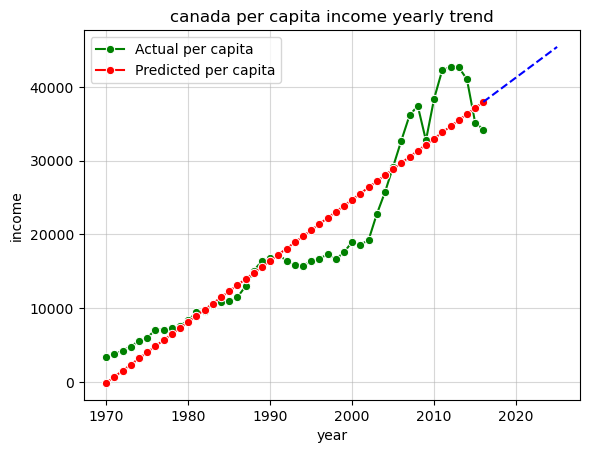

In [72]:
# step 3.1 :
sns.lineplot(data = df,x = 'year',y = 'income',color = 'g',marker= 'o',label = 'Actual per capita')
sns.lineplot(data = temp_df,x = 'year',y = 'y_pred_capita',color = 'r',marker= 'o',label = 'Predicted per capita')
sns.lineplot(data = future_df,x = 'year',y = 'per_capita',color = 'b',linestyle = '--')
plt.grid(alpha = 0.5)
plt.legend()
plt.title('canada per capita income yearly trend')
plt.show()

# step 10 : Input from where user can ask and predict capita based on year

In [77]:
year = int(input('Enter year to predict canada per capita : '))
capita = lr_model.predict([[year]])
final_capita = round(capita[0],2)
print(f'Predicted per capita of {year} is : {final_capita} (US$)')

Enter year to predict canada per capita :  2035


Predicted per capita of 2035 is : 53715.67 (US$)


In [74]:
# Designed by : ALTAF HUSAIN DATA ANALYST